In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import table
from astropy.io import fits

from burstiness import utils
import reader

In [8]:
merian = table.Table(fits.getdata('/Users/kadofong/Downloads/Merian_DR1_photoz_EAZY_v1.2.fits',1))
ms = reader.merianselect ( merian )
_galex = reader.galexcrossmatch ()
overlap = ms.index.intersection(_galex.index)

merian_sources = ms.reindex(overlap)

_galex = _galex.sort_values('fuv_exptime', ascending=False)

galex = _galex.loc[~_galex.index.duplicated(keep='first')].reindex(overlap).reset_index()

In [38]:
catalog_halum = pd.read_csv ( '/Users/kadofong/Desktop/merian_catalog_halum.csv', index_col=0, names=['halum'], skiprows=1)

In [31]:
lha_df = pd.read_csv('../local_data/output/lha_df.csv', index_col=0)

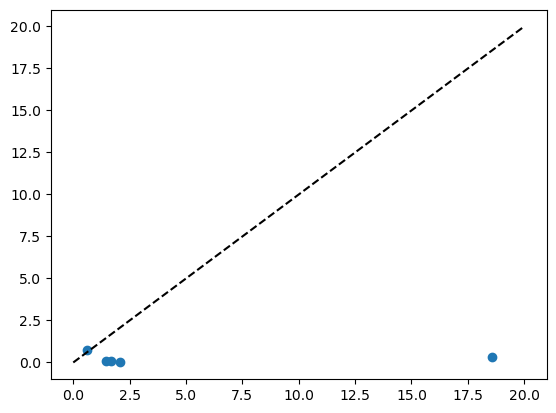

In [42]:
plt.scatter ( 
    catalog_halum/1e40,
    lha_df['LHa'], 
)
xs = np.linspace(0., 20.,10)
plt.plot(xs,xs,color='k', ls='--')